In [7]:
from pylab import *
%matplotlib inline

Se utiliza el metodo de Runge Kutta con argumentos, como se vio en clase

In [8]:
def rk4(ec,p_ini,x,args=0,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Se define la ecuacion de movimiento del oscilador armonico o en dos dimensiones (x,y) el que la fuerza esta dada por F = −kr y, con friccion 

In [9]:
def e_mov(r_v,t,fric=0,k=1):
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = -k*r_v[0],-k*r_v[1]
    else:    
        dvx = -k*r_v[0] - fric([dx,dy])[0]
        dvy = -k*r_v[1] - fric([dx,dy])[1]
    return array([dx,dy,dvx,dvy])

Se define la ecuacion de movimiento del oscilador armonico o en dos dimensiones y coordenadas polares (x=rcos(ang),y=rsen(ang)) el que la fuerza esta dada por F = −kr y, con friccion 

In [10]:
def e_mov_pol(r_v,t,fric=0,k=1):
    dx = r_v[2]
    dy = r_v[3]
    dxp =  r_v[2]*cos(r_v[1])-r_v[0]*r_v[3]*sin(r_v[1])
    dyp =  r_v[2]*sin(r_v[1])+r_v[0]*r_v[3]*cos(r_v[1])
    if fric == 0:
        dvy,dvx = -2*r_v[2]*r_v[3],-k*r_v[0] + r_v[0]*(r_v[3]**2)
    else:
        dvy = (-2*r_v[2]*r_v[3] + (fric([dxp,dyp])[0])*sin(r_v[1]) - (fric([dxp,dyp])[1])*cos(r_v[1]))/(r_v[0])
        dvx = -k*r_v[0] - (fric([dxp,dyp])[0])*cos(r_v[1]) -(fric([dxp,dyp])[1])*sin(r_v[1]) + r_v[0]*(r_v[3]**2)
    return array([dx,dy,dvx,dvy])

Aqui se definen las fricciones, que seran los argumentos en el metodo de Runge Kutta,
la friccion es  = −γv si |v| ≤ 1, pero cuando |v| > 1 la friccion es = −µ|v|^(3/2)v.  Si m = 1,
γ = 0.1 y µ = 0.2

In [12]:
def fric_v(v,gamma=0.1,mu=0.2):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    if norm_v < 1:
        f_x = gamma*v[0]
        f_y = gamma*v[1]
    else:    
        f_x = mu*(norm_v**(1.5))*v[0]
        f_y = mu*(norm_v**(1.5))*v[1]
    return array([f_x,f_y]) 

Con condiciones iniciales ro = (0, 1) y vo = (cos θ,sin θ), donde
θ =nπ/6.
con n = 0, 1, 2, 3, ..., 10, 11.

En coordenadas cartesianas 

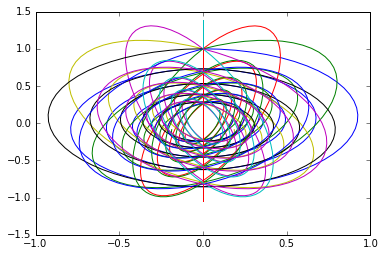

In [108]:
for n in range(12):
    p = [0,1,cos((n*pi)/6),sin((n*pi)/6)]
    t,sol_fv=rk4(e_mov,p,[0,30],fric_v)
    plot(sol_fv[:,0],sol_fv[:,1])

En el caso de n = 3 y n = 9 las orbitas son tan cerradas que el movimiento se limita al eje y, llendo de la parte positiva de y a la negativa (y,0) a (-y,0), por lo que este movimiento es discontinuo en coordenadas polares, al ir de (r,π/2) a (r,-π/2) cuando r tiende a cero
debido a esta discontinuidad se omitieron estos casos en la simulacion para coordenadas polares

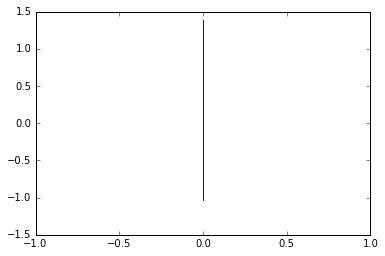

In [110]:
p = [0,1,cos((3*pi)/6),sin((3*pi)/6)] # para n = 3 , 6 se tiene que el moviemiento se limita al eje y
t,sol_fv=rk4(e_mov,p,[0,20],fric_v)
xlim(-1,1)
plot(sol_fv[:,0],sol_fv[:,1])

En coordenadas polares 

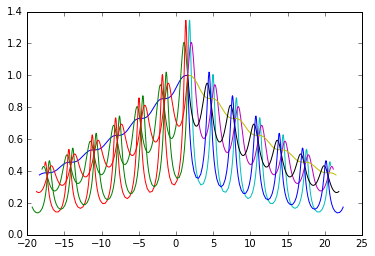

In [127]:
r=1 # haciendo un cambio de coordenadas 
ang = pi/2 
for j in range(12):
    if j == 3: # se omitieron los casos donde j = 3 y j = 9 para evitar discontinuidades 
        j = 3
    elif j == 9:
        j = 9  
    else:    
        v_ang = -cos((j*pi)/6)
        v_r = sin((j*pi)/6)
        p = [r,ang,v_r,v_ang]
        t,sol_fvp=rk4(e_mov_pol,p,[0,20],fric_v)
        plot(sol_fvp[:,1],sol_fvp[:,0])
show()

la siguiente funcíon  calcula la energía para las distintas condiciones iniciales y detiene la
simulacíon cuando esta sea menor al 1 % de su valor inicial.

Energia inicial = 1.5
Energia final = 0.014954783788


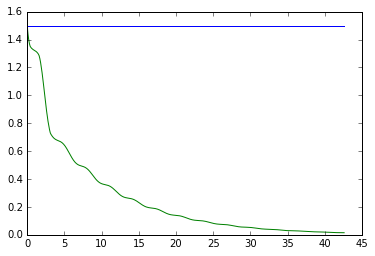

In [113]:
p = [0,1,1,1]
norm_v_i = (p[2]**2 + p[3]**2)
norm_r_i = (p[0]**2 + p[1]**2)
E_in = .5*(norm_v_i + norm_r_i) 
E_fin = .01*E_in 
E = E_in 
i = 0
while (E) >= E_fin:
    i += 1
    t,sol_id=rk4(e_mov,p,[0,i*.1])
    t,sol_fv=rk4(e_mov,p,[0,i*.1],fric_v)
    norm_v_id = (sol_id[:,2]**2 + sol_id[:,3]**2)
    norm_r_id = (sol_id[:,0]**2 + sol_id[:,1]**2)
    norm_v_fv = (sol_fv[:,2]**2 + sol_fv[:,3]**2)
    norm_r_fv = (sol_fv[:,0]**2 + sol_fv[:,1]**2)
    E_id = .5*(norm_v_id + norm_r_id)
    E_fv = .5*(norm_v_fv + norm_r_fv)
    E = E_fv[-1]
print  "Energia inicial =",E_in  
print  "Energia final =",E_fv[-1] 
plot(t,E_id,t,E_fv) # grafica la energia en funcion de t para el caso sin friccion y el caso con friccion
show()

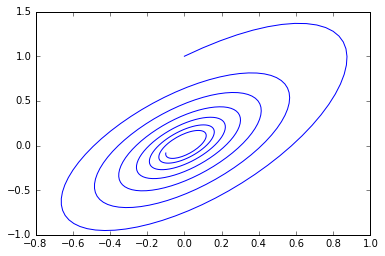

In [116]:
plot(sol_fv[:,0],sol_fv[:,1]) # grafica la trayectoria de la particula en el plano (x,y) hasta llegar al 1% de su energia inicial
show()

gráficas del momento angular para los casos anteirores en el inciso b)

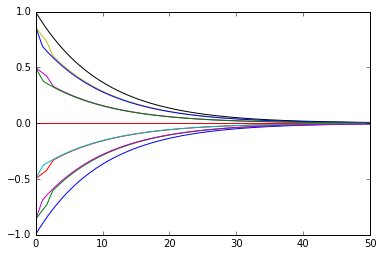

In [118]:
for n in range(12):
    p = [0,1,cos((n*pi)/6),sin((n*pi)/6)]
    t,sol_fv=rk4(e_mov,p,[0,50],fric_v)
    L_fv = (sol_fv[:,0]*sol_fv[:,3] - sol_fv[:,1]*sol_fv[:,2])
    plot (t,L_fv)
show()

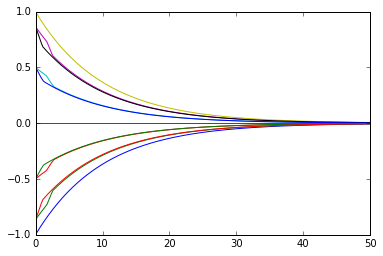

In [124]:
r=1 # haciendo un cambio de coordenadas 
ang = pi/2 
for j in range(12):
    if j == 3: # se omitieron los casos donde n = 3 y n = 9 para evitar discontinuidades 
        j = 3
    elif j == 9:
        j = 9  
    else:    
        v_ang = -cos((j*pi)/6)
        v_r = sin((j*pi)/6)
        p = [r,ang,v_r,v_ang]
        t,sol_fvp=rk4(e_mov_pol,p,[0,50],fric_v)
        L_fvp = (sol_fvp[:,0]**2)*(sol_fvp[:,3])
        plt.axhline(0,color='red')
        plot (t,L_fvp)
show()

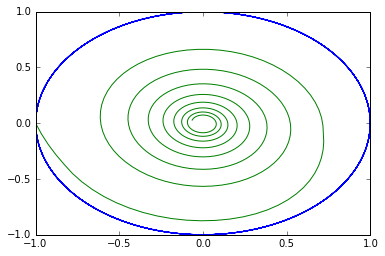

In [131]:
p = [0,1,-1,1]
t,sol_id=rk4(e_mov,p,[0,50])
t,sol_fv=rk4(e_mov,p,[0,50],fric_v)
plot (sol_id[:,2],sol_id[:,0],sol_fv[:,2],sol_fv[:,0])
show()

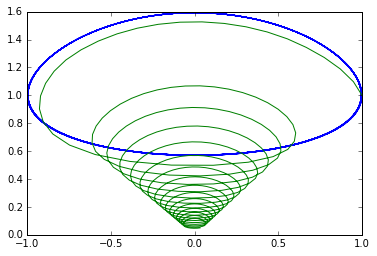

In [130]:
p = [1,pi/2,1,1]
t,sol_idp=rk4(e_mov_pol,p,[0,50])
t,sol_fvp=rk4(e_mov_pol,p,[0,50],fric_v)
plot (sol_idp[:,2],sol_idp[:,0],sol_fvp[:,2],sol_fvp[:,0])
show()